# <p style="color:red;">  Opioids and Drug-Related Deaths  
    
## DSC 540 | Advanced Machine Learning 
## Exploratory Data Analysis

### <p style="color:gray;"> Libraries

In [16]:
!pip install folium
!pip install geopandas
!pip install plotly

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import json
import geopandas as gpd
import plotly.express as px

In [18]:
import os
os.getcwd()

'/home/jordan/rot/ent/gitOp'

## <p style="color:purple;"> Connecticut Medicare Part_D Opioid Prescriber Summary File 2014 Dataset

In [19]:
df = pd.read_csv('data/Connecticut_Medicare_Part_D_Opioid_Prescriber_Summary_File_2014.csv')

In [20]:
df.head()

,NPI,NPPES Provider Last/Org Name,NPPES Provider First Name,NPPES Provider Zip Code,NPPES Provider State,Specialty Description,Total Claim Count,Opioid Claim Count,Opioid Prescribing Rate
0,1952310666,A'BODJEDI,ENENGE,6902,CT,Psychiatry,4476,0.0,0.00%
1,1922419209,AAMAR,ALI,6708,CT,Student in an Organized Health Care Education/...,91,NaN,NaN
2,1336297894,AARON,STUART,6880,CT,Ophthalmology,388,0.0,0.00%
3,1417991456,AARONSON,BETH,6810,CT,Physical Medicine and Rehabilitation,378,123.0,32.54%
4,1285925305,AARONSON,NICOLE,6510,CT,Student in an Organized Health Care Education/...,87,19.0,21.84%


In [21]:
#Adding leading zero to Zip Codes
df['NPPES Provider Zip Code'] = df['NPPES Provider Zip Code'].astype(str)
df['NPPES Provider Zip Code'] = df['NPPES Provider Zip Code'].str.zfill(5)
df['NPPES Provider Zip Code'].head()

0    06902
1    06708
2    06880
3    06810
4    06510
Name: NPPES Provider Zip Code, dtype: object

- NPPES (National Plan and Provider Enumeration System)  
  
    - The Administrative Simplification provisions of the Health Insurance Portability and Accountability Act of 1996 (HIPAA) mandated the adoption of standard unique identifiers for health care providers and health plans.  
      
    - The purpose of these provisions is to improve the efficiency and effectiveness of the electronic transmission of health information. The Centers for Medicare & Medicaid Services (CMS) has developed the National Plan and Provider Enumeration System (NPPES) to assign these unique identifiers.

In [22]:
df.shape

(16506, 9)

In [23]:
df.columns

Index(['NPI', 'NPPES Provider Last/Org Name', 'NPPES Provider First Name',
       'NPPES Provider Zip Code', 'NPPES Provider State',
       'Specialty Description', 'Total Claim Count', 'Opioid Claim Count',
       'Opioid Prescribing Rate'],
      dtype='object')

In [24]:
#Chnaging column name for ZIPCode
df.columns = ['NPI', 'NPPES Provider Last/Org Name', 'NPPES Provider First Name',
       'ZIPCode', 'NPPES Provider State',
       'Specialty Description', 'Total Claim Count', 'Opioid Claim Count',
       'Opioid Prescribing Rate']

In [25]:
#Cleaning the Percentage Column
def p2f(x):
    return float(x.strip('%'))/100

rate = list(df['Opioid Prescribing Rate'])

new_rates = []
for n in rate:
    if isinstance(n,str):
        n_new = p2f(n)
        new_rates.append(n_new)
    else:
        new_rates.append(n)
new_rates

df['Opioid Prescribing Rate'] = new_rates
df.head()

,NPI,NPPES Provider Last/Org Name,NPPES Provider First Name,ZIPCode,NPPES Provider State,Specialty Description,Total Claim Count,Opioid Claim Count,Opioid Prescribing Rate
0,1952310666,A'BODJEDI,ENENGE,06902,CT,Psychiatry,4476,0.0,0.0000
1,1922419209,AAMAR,ALI,06708,CT,Student in an Organized Health Care Education/...,91,NaN,NaN
2,1336297894,AARON,STUART,06880,CT,Ophthalmology,388,0.0,0.0000
3,1417991456,AARONSON,BETH,06810,CT,Physical Medicine and Rehabilitation,378,123.0,0.3254
4,1285925305,AARONSON,NICOLE,06510,CT,Student in an Organized Health Care Education/...,87,19.0,0.2184


### Column Descriptions (Self-Made)

- **NPI**: NPI (National Provider Identifier) Number is a 10-digit numerical identifier used to identify an individual provider or a health care entity. An NPI number is shared with other providers, employers, health plans, and payers. (Unique Identifer)
- **NPPES Provider Last/Org Name**: Last Name or Organization Name of the NPPES Provider
- **NPPES Provider First Name**: First Name of the NPPES Provider
- **NPPES Provider Zip Code**: ZIP Code of the NPPES Provider
- **NPPES Provider State**: State of the NPPES Provider 
- **Speciality Description**: Brief description of the health providers practice (what they specialize in)
- **Total Claim Count**:  The total count the NPPES has claimed claimed 
- **Opioid Claim Count**: Subset of the claim count, count of claims that are Opioid related
- **Opioid Prescribing Rate**:  *Opioid Claim Count* / *Total Claim Count*

### <span style="color:green"> **Where in Connecticut is our data coming from?** </span>  

#### <span style="color:green"> *NPPES Provider State + ZIP Code Analysis* </span>  


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16506 entries, 0 to 16505
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   NPI                           16506 non-null  int64  
 1   NPPES Provider Last/Org Name  16504 non-null  object 
 2   NPPES Provider First Name     16506 non-null  object 
 3   ZIPCode                       16506 non-null  object 
 4   NPPES Provider State          16506 non-null  object 
 5   Specialty Description         16506 non-null  object 
 6   Total Claim Count             16506 non-null  int64  
 7   Opioid Claim Count            10896 non-null  float64
 8   Opioid Prescribing Rate       10896 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 1.1+ MB


In [27]:
df.isna().sum()

NPI                                0
NPPES Provider Last/Org Name       2
NPPES Provider First Name          0
ZIPCode                            0
NPPES Provider State               0
Specialty Description              0
Total Claim Count                  0
Opioid Claim Count              5610
Opioid Prescribing Rate         5610
dtype: int64

In [28]:
df['Opioid Prescribing Rate'].value_counts()

0.0000    4425
0.5000      36
0.3333      20
0.0258      16
0.2500      13
          ... 
0.4505       1
0.2469       1
0.7500       1
0.4150       1
0.6701       1
Name: Opioid Prescribing Rate, Length: 2962, dtype: int64

In [29]:
#df['NPPES Provider Zip Code'].value_counts()

In [31]:
ct = gpd.read_file('data/ct_connecticut_zip_codes_geo.min.json')
ct.head()
ct.columns = ['STATEFP10', 'ZIPCode', 'GEOID10', 'CLASSFP10', 'MTFCC10',
       'FUNCSTAT10', 'ALAND10', 'AWATER10', 'INTPTLAT10', 'INTPTLON10',
       'PARTFLG10', 'geometry']

In [32]:
map_df = ct.merge(df, on='ZIPCode')
map_df.shape

(15227, 20)

In [33]:
map_df.columns

Index(['STATEFP10', 'ZIPCode', 'GEOID10', 'CLASSFP10', 'MTFCC10', 'FUNCSTAT10',
       'ALAND10', 'AWATER10', 'INTPTLAT10', 'INTPTLON10', 'PARTFLG10',
       'geometry', 'NPI', 'NPPES Provider Last/Org Name',
       'NPPES Provider First Name', 'NPPES Provider State',
       'Specialty Description', 'Total Claim Count', 'Opioid Claim Count',
       'Opioid Prescribing Rate'],
      dtype='object')

Text(0.5, 1.0, 'Opioid Prescribing Rate in Conneticut')

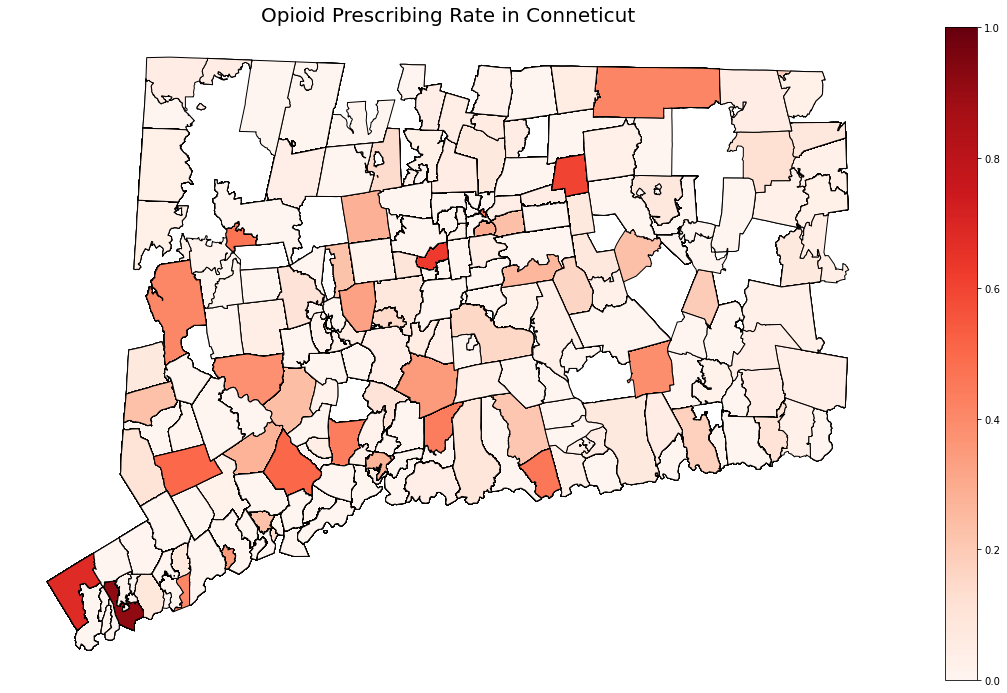

In [34]:
ct_opioid_rate = map_df.plot(column = map_df['Opioid Prescribing Rate'],cmap = 'Reds',edgecolor = 'black',figsize=(20,12),
                        legend = True,vmin = 0,vmax = 1)

ct_opioid_rate.axis('off')
ct_opioid_rate.set_title("Opioid Prescribing Rate in Conneticut",fontsize = 20)

In [35]:
#average rate
map_df['Opioid Prescribing Rate'].mean()

0.11215609442907977

In [36]:
map_df.describe()[['Total Claim Count','Opioid Claim Count','Opioid Prescribing Rate']]

,Total Claim Count,Opioid Claim Count,Opioid Prescribing Rate
count,15227.000000,10124.000000,10124.000000
mean,970.243712,65.588700,0.112156
std,2360.845235,202.945904,0.177848
min,11.000000,0.000000,0.000000
25%,44.000000,0.000000,0.000000
50%,150.000000,16.000000,0.024250
75%,726.500000,57.000000,0.153125
max,56919.000000,6240.000000,1.000000
